In [1]:
from dataPrep import Config, TransformedData, VizualisedData, RegressionCallsDemand
from pprint import pprint

### Datentransformationen
#### Instanz der TransformedData-Klasse

In [2]:
config = Config.dict_config
my_transformed_data = TransformedData(**config)

Pfad zur CSV-Datei: sickness_table.csv erstellt.
Daten bereinigt und in DataFrame umgewandelt.
Daten transformiert


#### Überprüfe Build-Notes

In [3]:
for notes in my_transformed_data.df_build_notes:
    print(notes)

Daten bereinigen 
-----------------
Erfolgreich: Daten erfolgreich in einen DataFrame umgewandelt
Erfolgreich: Keine fehlenden Daten in der CSV-Datei
Erfolgreich: Keine nicht-ganzzahligen Werte in den Spalten n_sick, calls, n_duty, n_sby, sby_need, dafted
Werte in der n_sby-Spalte:[90]
Werte in der n_duty-Spalte:[1700 1800 1900]
Erfolgreich: Zusammenfassung des DataFrames als summary_list erstellt

Daten tranformieren
-----------------
Erfolgreich: Spalte 'demand' erstellt
Erfolgreich: Spalte 'n_sick_adj' erstellt
Erfolgreich: Spalte 'demand_pred' erstellt
Erfolgreich: Spalte 'calls_reg_pred' erstellt
Erfolgreich: Spalte 'calls_reg_act_diff' erstellt


#### Überprüfe neuen tranformierten DataFrame

In [4]:
my_transformed_data.df_tformed

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,day,demand,n_sick_adj,demand_pred,calls_reg_pred,calls_reg_act_diff
0,2016-04-01,73,8154,1700,90,4,0,1,1631.0,82,1631,7059,1095
1,2016-04-02,64,8526,1700,90,70,0,2,1706.0,72,1706,7060,1466
2,2016-04-03,68,8088,1700,90,0,0,3,NaN,76,1618,7062,1026
3,2016-04-04,71,7044,1700,90,0,0,4,NaN,79,1409,7063,-19
4,2016-04-05,63,7236,1700,90,0,0,5,NaN,70,1448,7065,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544,1900,90,0,0,1148,NaN,86,1709,8774,-230
1148,2019-05-24,81,8814,1900,90,0,0,1149,NaN,81,1763,8776,38
1149,2019-05-25,76,9846,1900,90,146,56,1150,1970.0,76,1970,8777,1069
1150,2019-05-26,83,9882,1900,90,160,70,1151,1977.0,83,1977,8779,1103


#### Speichere Regressionsmodell, das 'demand_pred' erzeugt

'demand' ist NaN an den Tagen, an denen 'sby_need' < 1 ist. Für diese Tage musst ein Regressionsmodell verwendet werden um das Verhältnis zwischen 'calls' und 'demand' zu modellieren.

In [5]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:8080")
artifact_path = "bereitschaftsdienstplans"

In [6]:
# Create a new MLflow Experiment
mlflow.set_experiment("RegressionCallsDemand")

<Experiment: artifact_location='mlflow-artifacts:/238431178062761885', creation_time=1700662986978, experiment_id='238431178062761885', last_update_time=1700662986978, lifecycle_stage='active', name='RegressionCallsDemand', tags={}>

In [7]:
df_4_reg = my_transformed_data.df_tformed
reg_calls_demand = RegressionCallsDemand(df_4_reg).model_ftd_reg_calls_demand

In [8]:
# Initiate the MLflow run context
with mlflow.start_run(run_name='1') as run:

    # trainiertes Modell-Instanz protokollieren
    mlflow.sklearn.log_model(artifact_path=artifact_path, sk_model=reg_calls_demand)

mlflow.end_run()

#### Speichere Regressionsmodell für den allgemeinen Trend der Daten

Die Anzahl an 'calls' weißt einen allgemeinen positiv steigenden Trend auf. Um die Daten stationäre zu machen, nachdem den Trend bestimmt wurde, wird die Daten zerlegt indem der Trend-Anteil raussubtrahiert wird. Das fitted Regressionsmodel wird dabei mit MLFlow gespeichert.

In [9]:
model_trend_reg = my_transformed_data.trend_reg.model_ftd

In [10]:
# Create a new MLflow Experiment
mlflow.set_experiment("TrendRegression")

<Experiment: artifact_location='mlflow-artifacts:/162309136132002052', creation_time=1700644939220, experiment_id='162309136132002052', last_update_time=1700644939220, lifecycle_stage='active', name='TrendRegression', tags={}>

In [11]:
# Initiate the MLflow run context
with mlflow.start_run(run_name='1') as run:

    # trainiertes Modell-Instanz protokollieren
    mlflow.sklearn.log_model(artifact_path=artifact_path, sk_model=model_trend_reg)

mlflow.end_run()

### Visualisierungen
#### Instanz der VisualisedDate-Klasse erstellen

In [12]:
viz = VizualisedData(my_transformed_data.df_tformed)

#### Streuungsdiagramm des Verhältnis zwischen Anzahl and Notrufe und Gesamtnachfrage an Einsatzfahrende

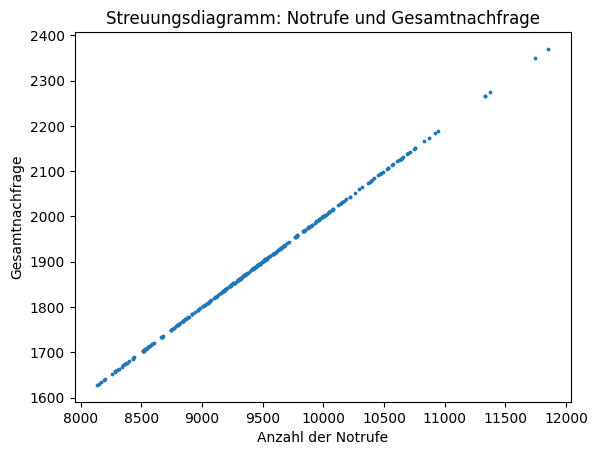

In [13]:
viz.demand_vs_calls()

#### Regressionslinie zeigt den allgemeinen steigenden Trend der Anzahl an Notrufen

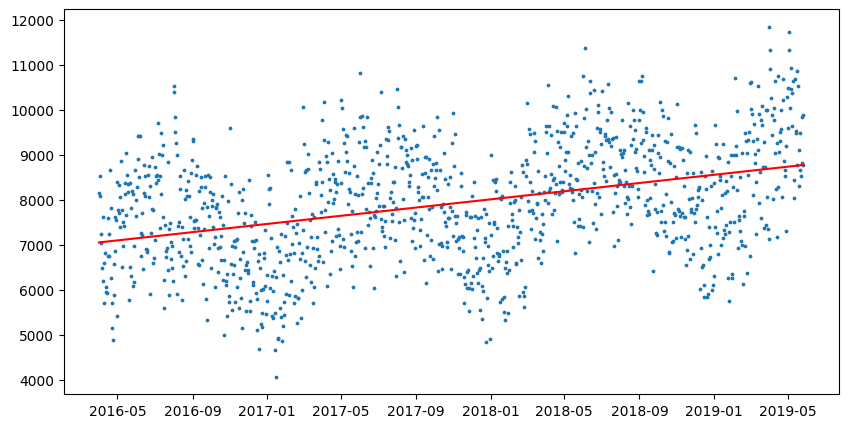

In [14]:
viz.plot_notruf_reg()

#### Daten werden zerlegt und das Ergebnis ist einer stationäre Datensatz mit Seasonalität und Rest

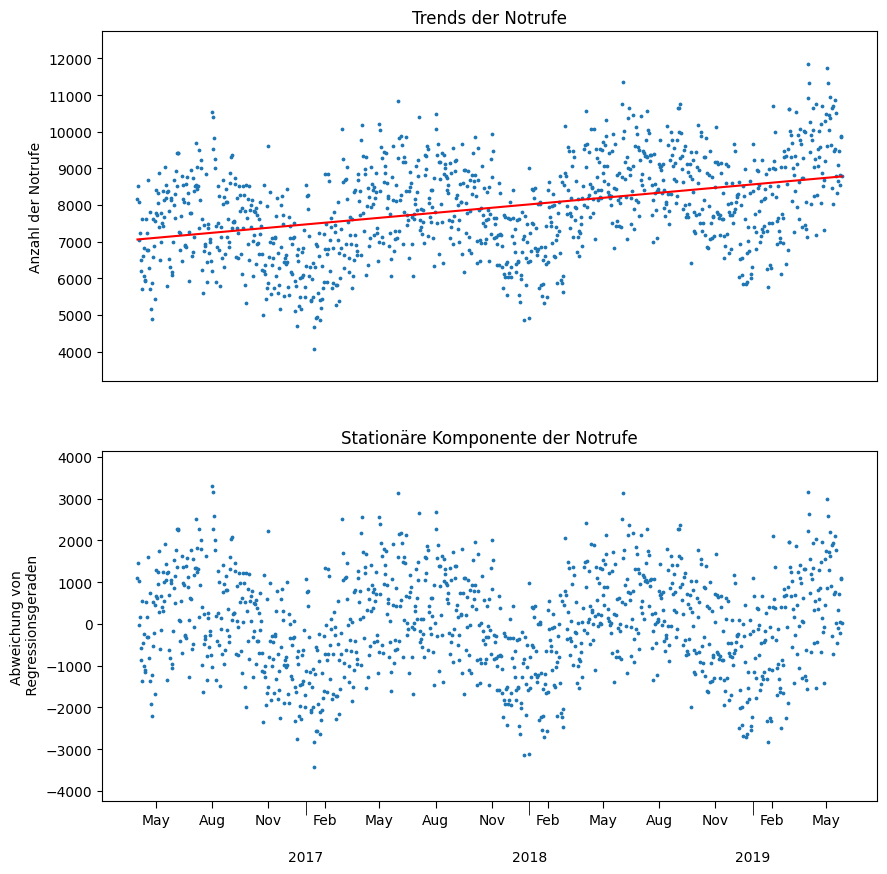

In [15]:
viz.no_trend_scatter()

#### 'not_used_kwargs' zeigt welche Argumente aus dem Config-Klasse nicht verwendet wurden

In [16]:
my_transformed_data.not_used_kwargs

{'features': ('month',
  'dayofmonth',
  'weekday',
  'weekofyear',
  'dayofyear',
  'season')}